<a href="https://colab.research.google.com/github/TKhahahah/Text_Analytics/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


In [3]:
# Old libraries that we know and love.
import numpy as np
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

# Our new libraries.
from sklearn import model_selection, linear_model, feature_selection, metrics

In [4]:
!pip install pyarrow
import pyarrow.parquet as pq

In [5]:
taxi = pd.read_parquet('/content/drive/MyDrive/DTW2/cleaned_final.parquet')
taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,congestion_surcharge,Airport_fee,date,time,weekday,duration
0,2,2024-10-01 00:30:44,2024-10-01 00:48:26,1.0,3.00,1.0,162,246,18.400000,1.50,0.00,2.5,0.0,2024-10-01,0,Tuesday,17.700001
1,1,2024-10-01 00:12:20,2024-10-01 00:25:25,1.0,2.20,1.0,48,236,14.200000,3.80,0.00,2.5,0.0,2024-10-01,0,Tuesday,13.083333
2,1,2024-10-01 00:04:46,2024-10-01 00:13:52,1.0,2.70,1.0,142,24,13.500000,3.70,0.00,2.5,0.0,2024-10-01,0,Tuesday,9.100000
3,1,2024-10-01 00:12:10,2024-10-01 00:23:01,1.0,3.10,1.0,233,75,14.200000,2.00,0.00,2.5,0.0,2024-10-01,0,Tuesday,10.850000
5,2,2024-10-01 00:31:20,2024-10-01 00:36:00,2.0,0.97,1.0,137,137,7.200000,2.44,0.00,2.5,0.0,2024-10-01,0,Tuesday,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148500,1,2024-12-31 23:42:33,2024-12-31 23:53:54,1.0,1.70,1.0,61,71,11.400000,0.00,0.00,2.5,0.0,2024-12-31,23,Tuesday,11.350000
11148501,1,2024-12-31 23:21:36,2024-12-31 23:32:10,1.0,1.60,1.0,188,61,13.280000,0.00,0.00,2.5,0.0,2024-12-31,23,Tuesday,10.566667
11148504,1,2024-12-31 23:14:53,2024-12-31 23:35:13,1.0,2.90,1.0,145,164,21.940001,0.00,6.94,2.5,0.0,2024-12-31,23,Tuesday,20.333334
11148508,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,181,255,4.460000,5.19,0.00,2.5,0.0,2024-12-31,23,Tuesday,25.316668


In [6]:
taxi2 = taxi[['trip_distance','RatecodeID','fare_amount','tip_amount','tolls_amount','Airport_fee','duration']]
taxi2

,trip_distance,RatecodeID,fare_amount,tip_amount,tolls_amount,Airport_fee,duration
0,3.00,1.0,18.400000,1.50,0.00,0.0,17.700001
1,2.20,1.0,14.200000,3.80,0.00,0.0,13.083333
2,2.70,1.0,13.500000,3.70,0.00,0.0,9.100000
3,3.10,1.0,14.200000,2.00,0.00,0.0,10.850000
5,0.97,1.0,7.200000,2.44,0.00,0.0,4.666667
...,...,...,...,...,...,...,...
11148500,1.70,1.0,11.400000,0.00,0.00,0.0,11.350000
11148501,1.60,1.0,13.280000,0.00,0.00,0.0,10.566667
11148504,2.90,1.0,21.940001,0.00,6.94,0.0,20.333334
11148508,3.94,1.0,4.460000,5.19,0.00,0.0,25.316668


# Split train-test

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
# Normalize data using MIN MAX
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(taxi2)
taxi_normalized = scaler.transform(taxi2)
print(taxi_normalized)

[[0.03085974 0.         0.06420462 ... 0.         0.         0.09326377]
 [0.02260295 0.         0.04723423 ... 0.         0.         0.06745551]
 [0.02776344 0.         0.04440583 ... 0.         0.         0.04518774]
 ...
 [0.02982764 0.         0.07850823 ... 0.04626667 0.         0.10798472]
 [0.04056146 0.         0.00787911 ... 0.         0.         0.13584274]
 [0.04324492 0.         0.09923632 ... 0.         0.         0.11133885]]


In [9]:
taxi_normalized

array([[0.03085974, 0.        , 0.06420462, ..., 0.        , 0.        ,
        0.09326377],
       [0.02260295, 0.        , 0.04723423, ..., 0.        , 0.        ,
        0.06745551],
       [0.02776344, 0.        , 0.04440583, ..., 0.        , 0.        ,
        0.04518774],
       ...,
       [0.02982764, 0.        , 0.07850823, ..., 0.04626667, 0.        ,
        0.10798472],
       [0.04056146, 0.        , 0.00787911, ..., 0.        , 0.        ,
        0.13584274],
       [0.04324492, 0.        , 0.09923632, ..., 0.        , 0.        ,
        0.11133885]], dtype=float32)

In [8]:
# taxi_normalized = pd.DataFrame(taxi_normalized, columns=taxi2.columns)
# taxi_normalized

,trip_distance,RatecodeID,fare_amount,tip_amount,tolls_amount,Airport_fee,duration
0,0.000008,0.0,0.004382,0.142874,0.48388,0.5,0.129179
1,0.000006,0.0,0.004369,0.146327,0.48388,0.5,0.128766
2,0.000007,0.0,0.004367,0.146177,0.48388,0.5,0.128410
3,0.000008,0.0,0.004369,0.143625,0.48388,0.5,0.128566
4,0.000000,0.0,0.004336,0.140623,0.48388,0.5,0.127621
...,...,...,...,...,...,...,...
11148403,0.000027,0.0,0.004315,0.140623,0.48388,0.5,0.129742
11148404,0.000011,0.0,0.004322,0.140623,0.48388,0.5,0.128759
11148405,0.000010,0.0,0.004340,0.148413,0.48388,0.5,0.129860
11148406,0.000011,0.0,0.004408,0.140623,0.48388,0.5,0.129468


In [44]:
# # Select out our predictor columns and our response columns
# X = taxi2[['trip_distance','RatecodeID','tip_amount','tolls_amount','Airport_fee','duration']]
# y = taxi2[['fare_amount']]

# # Apply the scaler to X and y separately
# X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y)

In [45]:
# # X_scaled to pd
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

In [10]:
# Select out our predictor columns and our response columns
# Assuming the order of columns in taxi_normalized is the same as in taxi2:
# 'trip_distance', 'RatecodeID', 'fare_amount', 'tip_amount', 'tolls_amount', 'Airport_fee', 'duration'
X = taxi_normalized[:, [0, 1, 3, 4, 5, 6]] # Select columns for X (excluding fare_amount)
y = taxi_normalized[:, [2]] # Select column for y (fare_amount)

# Select subsets for training and testing
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=123)

In [13]:
X

array([[0.03085974, 0.        , 0.00262009, 0.        , 0.        ,
        0.09326377],
       [0.02260295, 0.        , 0.00663755, 0.        , 0.        ,
        0.06745551],
       [0.02776344, 0.        , 0.00646288, 0.        , 0.        ,
        0.04518774],
       ...,
       [0.02982764, 0.        , 0.        , 0.04626667, 0.        ,
        0.10798472],
       [0.04056146, 0.        , 0.0090655 , 0.        , 0.        ,
        0.13584274],
       [0.04324492, 0.        , 0.        , 0.        , 0.        ,
        0.11133885]], dtype=float32)

In [14]:
y

array([[0.06420462],
       [0.04723423],
       [0.04440583],
       ...,
       [0.07850823],
       [0.00787911],
       [0.09923632]], dtype=float32)

In [16]:
X_train

array([[0.03013727, 0.        , 0.00524017, 0.        , 0.        ,
        0.06801453],
       [0.01176592, 0.        , 0.        , 0.        , 0.        ,
        0.07388429],
       [0.01290123, 0.        , 0.01179039, 0.        , 0.        ,
        0.13379298],
       ...,
       [0.18299103, 0.2       , 0.        , 0.        , 1.        ,
        0.43026182],
       [0.01228197, 0.        , 0.00174672, 0.        , 0.        ,
        0.04910091],
       [0.00743111, 0.        , 0.00478603, 0.        , 0.        ,
        0.0253424 ]], dtype=float32)

In [17]:
y_train

array([[0.08820558],
       [0.03406198],
       [0.0726898 ],
       ...,
       [0.2726979 ],
       [0.03026385],
       [0.01895026]], dtype=float32)

# Base line

## Linear regression

In [18]:
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

LinearRegression()

In [21]:
# There are the slope and intercept of the line we computed.
# Beta_0
print(reg.intercept_)
# Beta_1
print(reg.coef_)

[0.0548701]
[[0.01794607 0.01207663 0.00188524 0.00421608 0.15551047 0.02382189]]


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Evaluate the model
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 0.00
Coefficient of determination: 0.42


In [27]:
print(f"R2 score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


R2 score: 0.42
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05


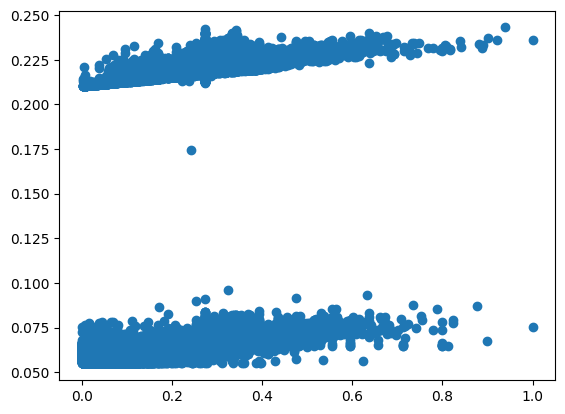

In [56]:
plt.scatter(y_test,y_pred)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


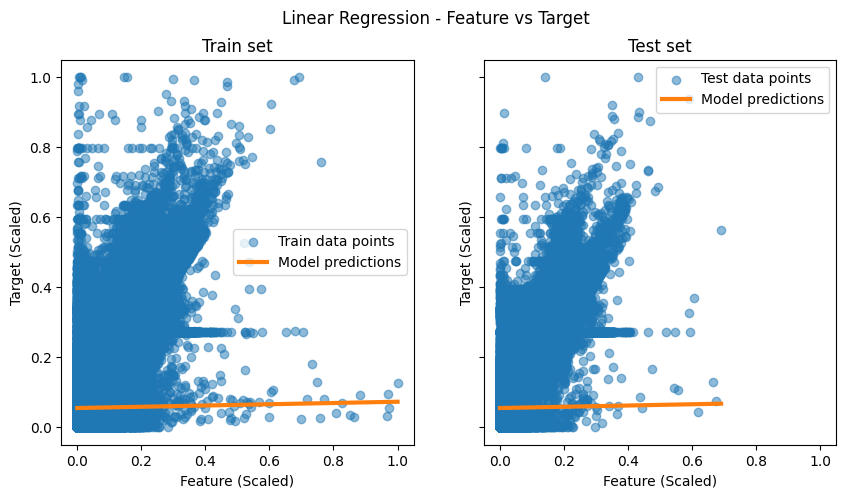

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

# Select the first feature for plotting
feature_index = 0
X_train_plot = X_train[:, feature_index].reshape(-1, 1)
X_test_plot = X_test[:, feature_index].reshape(-1, 1)

# Plot training data
ax[0].scatter(X_train_plot, y_train, label="Train data points", alpha=0.5)
# Create a range of values for the selected feature to plot the regression line
x_range = np.linspace(X_train_plot.min(), X_train_plot.max(), 100).reshape(-1, 1)
ax[0].plot(
    x_range,
    reg.predict(np.hstack([x_range, np.zeros((x_range.shape[0], X_train.shape[1] - 1))])), # Predict using only the selected feature and zeros for others
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature (Scaled)", ylabel="Target (Scaled)", title="Train set")
ax[0].legend()

# Plot test data
ax[1].scatter(X_test_plot, y_test, label="Test data points", alpha=0.5)
# Create a range of values for the selected feature to plot the regression line
x_range_test = np.linspace(X_test_plot.min(), X_test_plot.max(), 100).reshape(-1, 1)
ax[1].plot(
    x_range_test,
    reg.predict(np.hstack([x_range_test, np.zeros((x_range_test.shape[0], X_test.shape[1] - 1))])), # Predict using only the selected feature and zeros for others
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[1].set(xlabel="Feature (Scaled)", ylabel="Target (Scaled)", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression - Feature vs Target")

plt.show()

## Lasso

In [31]:
# Run the solver
regLasso = linear_model.Lasso(alpha=0.001,fit_intercept=True)#,normalize=True)
regLasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [51]:
y_pred_lasso = regLasso.predict(X_test)

In [32]:
print(regLasso.intercept_)
print(regLasso.coef_)

[0.02218484]
[0.         0.03298869 0.         0.         0.07139506 0.45495412]


In [52]:
print(f"R2 score: {r2_score(y_test, y_pred_lasso):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")

R2 score: 0.77
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03


In [34]:
# Use the metrics package to print our errors
print('training error')
print(metrics.mean_squared_error(y_train,regLasso.predict(X_train)))
print('testing error')
print(metrics.mean_squared_error(y_test,regLasso.predict(X_test)))

training error
0.0009774942882359028
testing error
0.000982683151960373


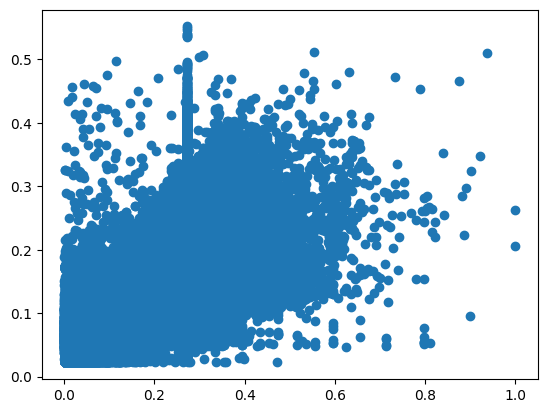

In [53]:
plt.scatter(y_test,y_pred_lasso)

## Ridge regression

In [35]:
ridge_reg = linear_model.Ridge(alpha=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [48]:
y_pred_ridge = ridge_reg.predict(X_test)

In [49]:
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

[0.00837936]
[ 0.8936938   0.10812522  0.36759925  0.18609793 -0.00716427  0.2996919 ]


In [50]:
print(f"R2 score: {r2_score(y_test, y_pred_ridge):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")

R2 score: 0.94
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02


In [38]:
print('training error')
print(metrics.mean_squared_error(y_train,ridge_reg.predict(X_train)))
print('testing error')
print(metrics.mean_squared_error(y_test,ridge_reg.predict(X_test)))

training error
0.0002550793578848243
testing error
0.00025565564283169806


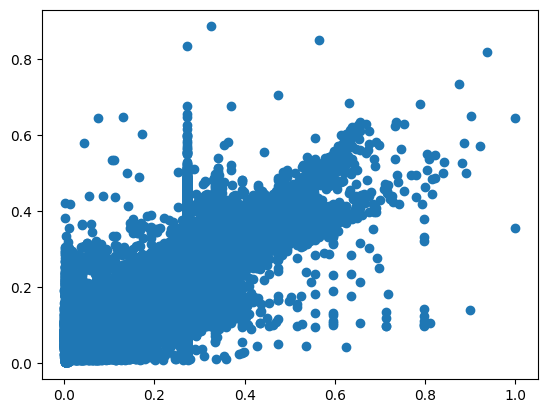

In [54]:
plt.scatter(y_test,y_pred_ridge)

#

# Random forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Run the decision tree regression algorithm
reg_random = RandomForestRegressor(max_depth=2,n_estimators=2,random_state=1234).fit(X_train, y_train.ravel())

In [46]:
y_pred_ran = reg_random.predict(X_test)

In [44]:
# Use the metrics package to print our errors
print('training error')
print(mean_squared_error(y_train,reg_random.predict(X_train)))
print('testing error')
print(mean_squared_error(y_test,reg_random.predict(X_test)))

training error
0.0006394632083167982
testing error
0.0006425427463953561


In [47]:
print(f"R2 score: {r2_score(y_test, y_pred_ran):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_ran):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_ran)):.2f}")

R2 score: 0.85
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03


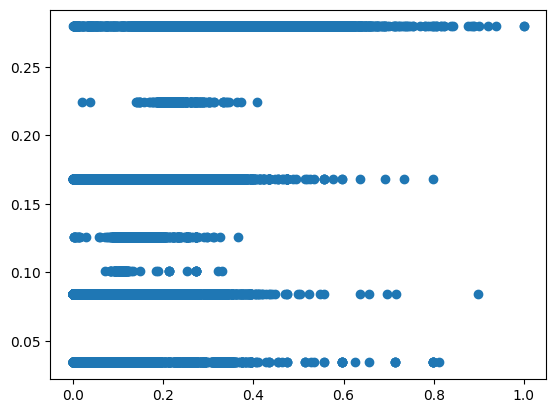

In [55]:
plt.scatter(y_test,y_pred_ran)

In [59]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest Regression'],
    'R2 Score': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_ran)],
    'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_lasso), mean_squared_error(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ran)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_error(y_test, y_pred_lasso)), np.sqrt(mean_squared_error(y_test, y_pred_ridge)), np.sqrt(mean_squared_error(y_test, y_pred_ran))]
})

# Format the numerical columns for better readability
results['R2 Score'] = results['R2 Score'].map('{:.2f}'.format)
results['MSE'] = results['MSE'].map('{:.4f}'.format)
results['RMSE'] = results['RMSE'].map('{:.4f}'.format)

display(results)

,Model,R2 Score,MSE,RMSE
0,Linear Regression,0.42,0.0025,0.0503
1,Lasso Regression,0.77,0.0010,0.0313
2,Ridge Regression,0.94,0.0003,0.0160
3,Random Forest Regression,0.85,0.0006,0.0253
